    NAMA  : AHMAD AFIDIN
    NIM   : 09011281722067
    KELAS : SK5A
    MK    : KECERDASAN BUATAN
    Dosen : Prof.Dr.Ir. Siti Nurmaini,M.T.
    
    
     
      
       
       

  ## PENERAPAN FUZZY LOGIC MENGGUNAKAN METODE MAMDANI PADA VACUUM CLEANER 
  Vacuum Cleaner atau yang biasa dikenal dengan sebutan alat penghisap debu berfungsi untuk membersihkan debu dari lantai dan karpet Debu selalu menjadi masalah utama pada rumah, terlebih jika debu tersebut berada pada karpet. Untuk itu dengan adanya alat pembersih debu atau vacuum cleaner dapat mempermudah pekerjaan rumah tangga tanpa membutuhkan tenaga ekstra untuk membersihkan debu-debu membandel tersebut. Dalam kasus ini masalah yang timbul yaitu bagaimana cara menerapkan logika fuzzy menggunakan metode mamdani pada vacuum cleaner untuk mengetahui apakah besar daya hisap yang dikeluarkan oleh alat vacuum cleaner sudah berjalan sesuai dengan yang diharapkan. Untuk menerapkan logika fuzzy menggunakan metode mamdani pada vacuum cleaner dilakukan beberapa tahapan diantaranya yaitu menentukan variabel fuzzy, kemudian menentukan nilai derajat keanggotaan, sistem interferensi atau aturan fuzzy, menentukan komposisi Min-Max dan yang terakhir yaitu defuzzifikasi menggunakan metode centroid. variabel input yang digunakan ada 2 input yaitu jumlah debu dan jenis permukaan lantai pada sebuah ruangan dan variabel output yang digunakan adalah besar hisapan pada vacuum cleaner tersebut.

#  Mengimpor Library Untuk Fuzzy

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

## Fuzzyfikasi
### Variabel fuzzy dan semesta pembicaraan


Input :
Banyak debu :
- Sedikit (2.5 - 50 %)
- Sedang (25 -75 %)
- Banyak (50-90 %)


Jenis Permukaan lantai:
- Halus (1 - 50 %)
- Sedang (30 - 70 %)
- Kasar (50 -75 %)

Output : 
Besar hisapan vacuum cleaner :
- kecil  (1 - 35 %)
- Sedang (20 - 60 %)
- Besar (35 -80 %)
- Sangat besar (50 - 80 %)


In [2]:
banyak_debu = ctrl.Antecedent(np.arange(0,101,1), 'banyak_debu')
permukaan_lantai = ctrl.Antecedent(np.arange(0,101,1), 'permukaan_lantai')
besar_hisapan = ctrl.Consequent(np.arange(0,101,1),'besar_hisapan')

3 variable fuzzy dengan masing masing semesta pembicaraannya
    pada coding tersebut `antecedent` adalah input yang akan kita gunakan, dan `consequent` sebagai hasil dari pengolahn kedua input atau outputnya yang akan kita gunakan.
    Angka-angla yang terdapat didalam tanda kurung merupakan batas awal, batas akhir, dan kelipatannya _**(start,stop,Stride)**_.

# Fuzzifikasi Banyak Debu

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk banyak debu, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ banyakdebu $$
$$ sedikit = 2,5 - 50 $$
$$ sedang = 25 - 75 $$
$$ banyak = 50 - 90 $$




Dengan fungsi keanggotaan:

\begin{equation}
  banyakdebu['sedikit'] = \mu banyakdebu(x)=\begin{cases}
    (x - 2.5)/(25 - 2.5) , & \text{$2.5 \leq x \leq 25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50$}.
  \end{cases}
  \\
  banyakdebu['sedang'] = \mu banyakdebu(x)=\begin{cases}
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
    0, & \text{$x\geq 75$}.
  \end{cases}
  \\
     banyakdebu['banyak'] = \mu banyakdebu(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(90 - 50) , & \text{$50 \leq x \leq 90$}.\\
    1, & \text{$x\geq 90$}.
  \end{cases}
\end{equation}


In [3]:
banyak_debu['sedikit'] = fuzz.trimf(banyak_debu.universe, [2.5, 25, 50])
banyak_debu['sedang'] = fuzz.trimf(banyak_debu.universe, [25, 50, 75])
banyak_debu['banyak'] = fuzz.trapmf(banyak_debu.universe, [50, 90, 100 ,100])

### Ploting fungsi keanggotaan banyak debu

C:\Users\AFIDIN\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


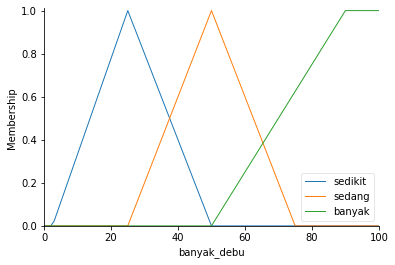

In [4]:
banyak_debu.view()

# Fuzzifikasi Permukaan Lantai


Untuk permukaan lantai, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ permukaanlantai $$
$$ halus = 1 - 50 $$
$$ sedang = 30 - 70 $$
$$ kasar = 50 - 75 $$




Dengan fungsi keanggotaan:

\begin{equation}
  permukaanlantai['halus'] = \mu permukaanlantai(x)=\begin{cases}
    (x - 1)/(25 - 1) , & \text{$1 \leq x \leq 25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50$}.
  \end{cases}
  \\
  permukaanlantai['sedang'] = \mu permukaanlantai(x)=\begin{cases}
    (x - 30)/(50 - 30) , & \text{$30 \leq x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x \leq 70$}.\\
    0, & \text{$x\geq 75$}.
  \end{cases}
  \\
     permukaanlantai['kasar'] = \mu permukaanlantai(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
    1, & \text{$x\geq 75$}.
  \end{cases}
\end{equation}


In [5]:
permukaan_lantai['halus'] = fuzz.trimf(permukaan_lantai.universe, [0, 25, 50])
permukaan_lantai['sedang'] = fuzz.trimf(permukaan_lantai.universe, [30, 50, 70])
permukaan_lantai['kasar'] = fuzz.trapmf(permukaan_lantai.universe, [50, 75, 100, 100])

### Ploting fungsi keanggotaan permukaan lantai

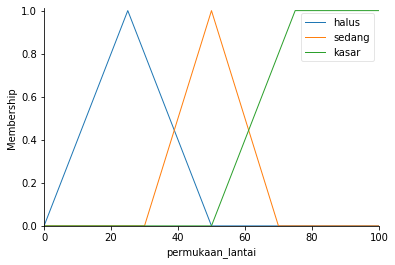

In [6]:
permukaan_lantai.view()

# Fuzzifikasi besar hisapan

Untuk besar hisapan, fungsi keanggotaannya dibagi menjadi 4 bagian :
$$ besar hisapan $$
$$ kecil = 1 - 35 $$
$$ sedang = 20 - 65 $$
$$ besar = 35 - 80 $$
$$ sangat besar = 65 - 85 $$




Dengan fungsi keanggotaan:

\begin{equation}
  besarhisapan['kecil'] = \mu besarhisapan(x)=\begin{cases}
    (x - 1)/(20 - 1) , & \text{$1 \leq x \leq 20$}.\\
    (35 - x)/(35 - 20) , & \text{$20 \leq x \leq 35$}.\\
    0, & \text{$x\geq 50$}.
  \end{cases}
  \\
  besarhisapan['sedang'] = \mu besarhisapan(x)=\begin{cases}
    (x - 20)/(40 - 20) , & \text{$20 \leq x \leq 40$}.\\
    (65 - x)/(65 - 40) , & \text{$40 \leq x \leq 65$}.\\
    0, & \text{$x\geq 65$}.
  \end{cases}
  \\
     besarhisapan['besar'] = \mu besarhisapan(x)=\begin{cases}
    (x - 35)/(60 - 35) , & \text{$35 \leq x \leq 60$}.\\
    (80 - x)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    0, & \text{$x\geq 85$}.
  \end{cases}
  \\
     besarhisapan['sangat besar'] = \mu besarhisapan(x)=\begin{cases}
    0, & \text{$x\leq 65$}.\\
    (x - 65)/(85 - 65) , & \text{$65 \leq x \leq 85$}.\\
    1, & \text{$x\geq 85$}.
  \end{cases}
\end{equation}


In [7]:
besar_hisapan['kecil'] = fuzz.trimf(besar_hisapan.universe, [0, 20, 35])
besar_hisapan['sedang'] = fuzz.trimf(besar_hisapan.universe, [20, 40, 65])
besar_hisapan['besar'] = fuzz.trimf(besar_hisapan.universe, [35, 60, 80])
besar_hisapan['sangat_besar'] = fuzz.trapmf(besar_hisapan.universe, [65, 85, 100, 100])

### Ploting fungsi keanggotaan besar hisapan

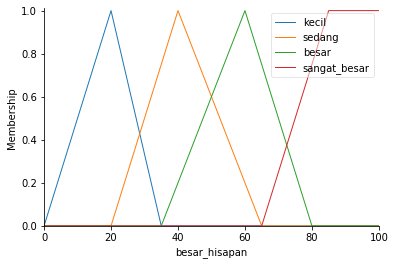

In [8]:
besar_hisapan.view()

# Metode Inferensi
Pada metode inferensi, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel banyak debu yang berjumlah 3 dan fuzzifikasi dari variabel permukaan lantai yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

1. IF Banyak_debu BANYAK dan Permukaan_lantai KASAR KERING THEN Besar_hisapan SANGAT BESAR
2. IF Banyak_debu SEDANG dan Permukaan_lantai KASAR THEN Durasi Besar_hisapan BESAR
3. IF Banyak_debu SEDIKIT dan Permukaan_lantai KASAR THEN Durasi Besar_hisapan SEDANG
4. IF Banyak_debu BANYAK dan Permukaan_lantai SEDANG THEN Durasi Besar_hisapan BESAR
5. IF Banyak_debu SEDANG dan Permukaan_lantai SEDANG THEN Durasi Besar_hisapan SEDANG
6. IF Banyak_debu SEDIKIT dan Permukaan_lantai SEDANG THEN Durasi Besar_hisapan KECIL
7. IF Banyak_debu BANYAK dan Permukaan_lantai HALUS THEN Durasi Besar_hisapan SEDANG
8. IF Banyak_debu SEDANG dan Permukaan_lantai HALUS THEN Durasi Besar_hisapan KECIL
9. IF Banyak_debu SEDIKIT dan Permukaan_lantai HALUS THEN Durasi Besar_hisapan KECIL


In [9]:
rule1 = ctrl.Rule(banyak_debu['banyak'] & permukaan_lantai['kasar'],besar_hisapan['sangat_besar'])
rule2 = ctrl.Rule(banyak_debu['sedang'] & permukaan_lantai['kasar'],besar_hisapan['besar'])
rule3 = ctrl.Rule(banyak_debu['sedikit'] & permukaan_lantai['kasar'],besar_hisapan['sedang'])
rule4 = ctrl.Rule(banyak_debu['banyak'] & permukaan_lantai['sedang'],besar_hisapan['besar'])
rule5 = ctrl.Rule(banyak_debu['sedang'] & permukaan_lantai['sedang'],besar_hisapan['sedang'])
rule6 = ctrl.Rule(banyak_debu['sedikit'] & permukaan_lantai['sedang'],besar_hisapan['kecil'])
rule7 = ctrl.Rule(banyak_debu['banyak'] & permukaan_lantai['halus'],besar_hisapan['sedang'])
rule8 = ctrl.Rule(banyak_debu['sedang'] & permukaan_lantai['halus'],besar_hisapan['kecil'])
rule9 = ctrl.Rule(banyak_debu['sedikit'] & permukaan_lantai['halus'],besar_hisapan['kecil'])

C:\Users\AFIDIN\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\AFIDIN\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x143c2862ba8>)

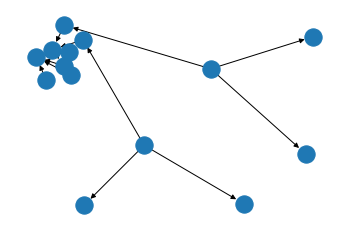

In [10]:
rule1.view()

### (Rule Evaluation) sebagai kontrol system fuzzy

In [11]:
besar_hisapan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9,])

#  Simulasi

In [12]:
sistem = ctrl.ControlSystemSimulation(besar_hisapan_ctrl)

## Memasukkan nilai input

**input banyak debu = 65 dan input permukaan lantai = 75**

In [13]:
sistem.input['banyak_debu'] = 65
sistem.input['permukaan_lantai'] = 75

### Melakukan perhitungan defuzzifikasi

In [14]:
sistem.compute()
print (sistem.output['besar_hisapan'])

69.44851166532581


**Plotting fungsi keangggotaan banyak debu setelah dimasukkan input nilai**

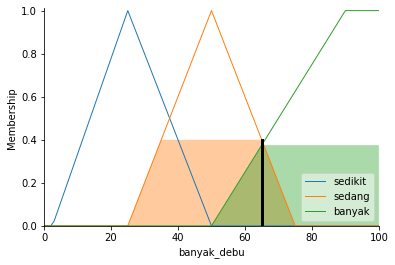

In [15]:
banyak_debu.view(sim=sistem)

**Plotting fungsi keangggotaan permukaan lantai setelah dimasukkan input nilai**

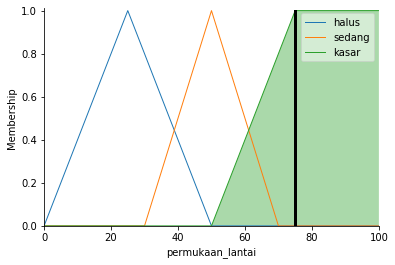

In [16]:
permukaan_lantai.view(sim=sistem)

**Plotting fungsi keangggotaan besar hisapan setelah dilakukan perhitungan defuzzifikasi output nilai pada besar hisapan**

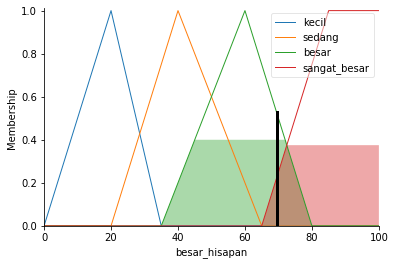

In [17]:
besar_hisapan.view(sim=sistem)

# Perhitungan Manual

## Penentuan Derajat Keanggotan



\begin{equation}
Banyak debu = 65 \\
    Masukkan\,nilai\,banyak debu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,banyak debu\\
  banyakdebu['sedikit'] = \mu banyakdebu(x)=\begin{cases}
    (x - 2.5)/(25 - 2.5) , & \text{$2.5 \leq x \leq 25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50$}.
  \end{cases}
  \\
  banyakdebu['sedang'] = \mu banyakdebu(x)=\begin{cases}
    (x - 25)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    (75 - x)/(75 - 50) , & \text{$50 \leq x \leq 75$}. \checkmark \\
    0, & \text{$x\geq 75$}.
  \end{cases}
  \\
     banyakdebu['banyak'] = \mu banyakdebu(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(90 - 50) , & \text{$50 \leq x \leq 90$}.\checkmark \\
    1, & \text{$x\geq 90$}.
  \end{cases}
\end{equation}


\begin{equation}
    \mu banyakdebuSEDANG(65) = (75 - 65) / (75 - 50) \\
    \mu SbanyakdebuSEDANG(65) = 10/25 \\ 
    \mu banyakdebuSEDANG(65) = 0,4 \\
    \mu banyakdebuBANYAK(65) = (65 - 50) / (90-50) \\
    \mu banyakdebuBANYAK(65) = 15/40 \\
    \mu banyakdebuBANYAK(65) = 0.375 \\
\end{equation}

\begin{equation}
Permukaan lantai = 75 \\
    Masukkan\,nilai\,permukaan lantai\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,permukaan lantai\\
  permukaanlantai['halus'] = \mu permukaanlantai(x)=\begin{cases}
    (x - 1)/(25 - 1) , & \text{$1 \leq x \leq 25$}.\\
    (50 - x)/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    0, & \text{$x\geq 50$}.
  \end{cases}
  \\
  permukaanlantai['sedang'] = \mu permukaanlantai(x)=\begin{cases}
    (x - 30)/(50 - 30) , & \text{$30 \leq x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x \leq 70$}.\\
    0, & \text{$x\geq 75$}.
  \end{cases}
  \\
     permukaanlantai['kasar'] = \mu permukaanlantai(x)=\begin{cases}
    0, & \text{$x\leq 50$}.\\
    (x - 50)/(75 - 50) , & \text{$50 \leq x \leq 75$}.\\
    1, & \text{$x\geq 75$}.\checkmark
  \end{cases}
\end{equation}



\begin{equation}
 \mu permukaanlantaiKASAR(x) = 1
\end{equation}

## Inferensi atau aturan implikasi

Selanjutnya adalah mencari fungsi implikasi dan defuzzyfikasi. Pada metode mamdani, fungsi implikasi yang digunakan adalah MIN atau menggunakan nilai minimum. Diambil dari rule based, maka ada 2 rule yang digunakan, yaitu:

1. Jika banyak debu **sedang** *(0.4)* dan permukaan lantai **kasar** *(1)*, maka besar hisapan **besar** *(0,4)*
2. Jika banyak debu **banyak** *(0.375)* dan permukaan lantai **kasar** *(1)*, maka besar hisapan **sangat besar***(0,375)*


## Agregasi atau komposisi aturan

Dari evaluasi rule yang sudah di dapatkan, dapat kita gambarkan rule aktif yang berjalan pada plot besar hisapan
1. pada plot besar hisapan = besar hisapan **besar** *(0.4)
2. pada plot besar hisapan = besar hisapan **sangat besar** *(0.375)

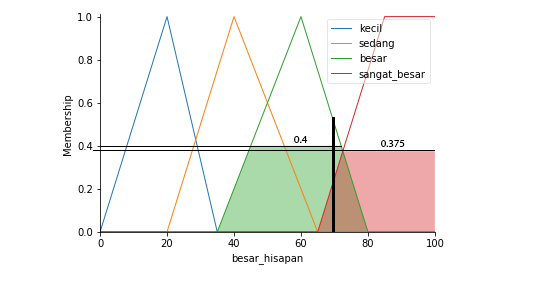

## Defuzzifikasi

Dengan menggunakan metode centroid maka nilai yang memenuhi pada agregasi yang terdapat di plot kita bagi
menjadi beberapa bagian agar kita bisa mencari nilai luas daerah yang memenuhi agregasi tersebut

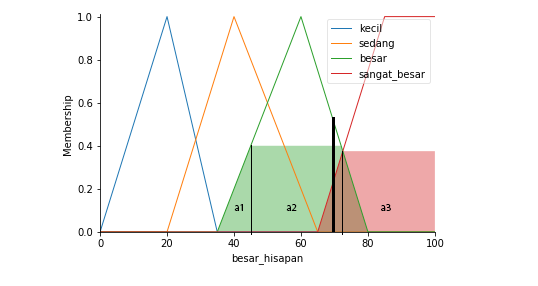

pada gambar di atas ,hasil dari agregasi kita bagi menjadi 3 bagian yaitu a1,a2, dan a3

langkah selanjutnya adalah menghitung nilai tengah(X) dan luas(A) dari masing masding bangun datar yang terbagi pada plot agregasi

## Menentukan Nilai X
$$ X1 =a + \frac{2}{3} (b-a)$$
$$ X1 =35 + \frac{2}{3} (45-35)$$
$$ X1 = 41.33$$


-------------------------------------------------------------------------------------------------------------------------


$$ X2 = \frac{1}{2} (a+b)$$
$$ X2 = \frac{1}{2} (45+75)$$
$$ X2 = 60$$

-------------------------------------------------------------------------------------------------------------------------

$$ X3 =\frac{1}{2} (a+b)$$
$$ X3 =\frac{1}{2} (75+100)$$
$$ X3 = 87.5$$



## Menentukan Nilai A
$$ A1 =\frac{1}{2} (a x t)$$
$$ A1 =\frac{1}{2} (10 x 0.4)$$
$$ A1 = 2$$


-------------------------------------------------------------------------------------------------------------------------


$$ A2 =p x l$$
$$ A2 =30 x 0.4$$
$$ A2 = 12$$

-------------------------------------------------------------------------------------------------------------------------

$$ A3 =p x l$$
$$ A3 =25 x 0.375$$
$$ A3 = 9.375$$

Setelah menentukan nilai X dan A dari masing masing bangun datar yang memenuhi agregasi

selanjutnya melakukan proses defuzzifikasi dengan metode centroid

$$  Hasil=\sum_{i}^{n}Xi.Ai \over \sum_{i}^{n}Ai
      $$
-------------------------------------------------------------------------------------------------------------------------
$$  Hasil=(X1xA1)+(X2xA2)+(X3xA3)\over A1+A2+A3
      $$
-------------------------------------------------------------------------------------------------------------------------
$$  Hasil=(41,33x2)+(60x12)+(87.5x9.375)\over 2+12+9.375
      $$
    
$$  Hasil=82.66 + 720 + 820.1325 \over 23.375
      $$
-------------------------------------------------------------------------------------------------------------------------
$$  Hasil=1622.972499 \over 23.375
      $$
-------------------------------------------------------------------------------------------------------------------------


$$ Hasil=69.431978$$



Hasil output yang dikeluarkan menggunakan code python sebesar 69.448511 sedangkan perhitungan manual sebesar 69.431978
Terdapat perbedaan sebesar 0.013167